In [1]:
from scipy.optimize import least_squares, minimize
import numpy as np
import matplotlib.pyplot as plt
from toy_datasets import ToyDatasets
from scipy.stats import norm

In [16]:
class Stage3Algorithm():
  def __init__(self, num_elements, h_order, ar_order):
    self.num_elements = num_elements
    self.h_order, self.ar_order = h_order, ar_order
    self.L, self.E = None, None

  def hankelise(self, x, order):
    """
    A function to take in an input vector of size 1x(n-1) and construct a Hankel matrix
    from it with a specified order (essentially specified number of rows). 
    """

    hankel_matrix = np.zeros((order, x.shape[1] - order + 1))
    for i in range(order):
      hankel_matrix[i, :] = x[0, i:i+x.shape[1]-order+1]
    return hankel_matrix

  def objective(self, params, x):
    size = len(params) // 2
    L, E = params[:size], params[size:]
    L, E = L.reshape(1, -1), E.reshape(1, -1)
    Lh = self.hankelise(L, self.h_order)
    result = np.linalg.norm(Lh, ord='nuc') + np.linalg.norm(E, 1)
    return result.flatten()

  def m_constraint(self, params, x):
    size = len(params) // 2
    L, E = params[:size], params[size:]
    L, E = L.reshape(1, -1), E.reshape(1, -1)
    return (x - L - E).flatten()

  # def n_constraint(self, params):
  #   size = len(params) // 2
  #   L, _ = params[:size], params[size:]
  #   L, _ = L.reshape(1, -1), E.reshape(1, -1)
    
  def fit(self, x):
    L_initial_guess, E_initial_guess = x, np.zeros(x.shape)
    params = np.concatenate([L_initial_guess.flatten(), E_initial_guess.flatten()])
    constraints = (
      {'type': 'eq', 'fun': self.m_constraint, 'args': (x,)},
      # {'type': 'eq', 'fun': self.n_constraint}
    )
    result = minimize(self.objective, params, args=(x,), constraints=constraints, method='trust-constr')
    size = x.shape[1]
    L, E = result.x[:size], result.x[size:]
    L, E = L.reshape(1, -1), E.reshape(1, -1)
    self.L, self.E = L, E

  # def predict(self, x):
  #   y_predicted = []
  #   for i in range(self.num_elements - self.order):
  #     y_predicted.append(np.dot(x.flatten()[i:i+self.order], self.A).flatten()[0])
  #   return y_predicted
  
  # def evaluate(self, y, y_predicted):
  #   return np.sqrt(1/len(y) * np.sum(np.square(y - y_predicted)))

In [17]:
num_elements = 100
toy_datasets = ToyDatasets(num_elements=num_elements)

In [4]:
np.random.seed(0)
toy_data = toy_datasets.stationary_without_noise(offset=5).reshape(-1, 1).T
alg = Stage3Algorithm(num_elements=num_elements, h_order=34, ar_order=3)
x = toy_data
alg.fit(x)

c:\Users\chris\fyp\venv\lib\site-packages\scipy\optimize\_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


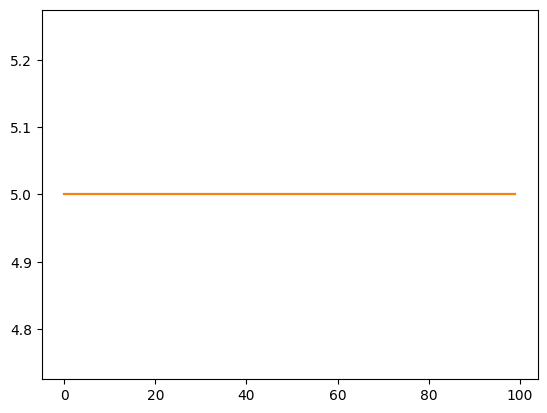

In [5]:
plt.plot(x.flatten())
plt.plot((alg.L + alg.E).flatten())

In [6]:
np.random.seed(0)
toy_data = toy_datasets.stationary_with_gaussian_noise(offset=5).reshape(-1, 1).T
alg = Stage3Algorithm(num_elements=num_elements, h_order=20, ar_order=3)
x = toy_data
alg.fit(x)

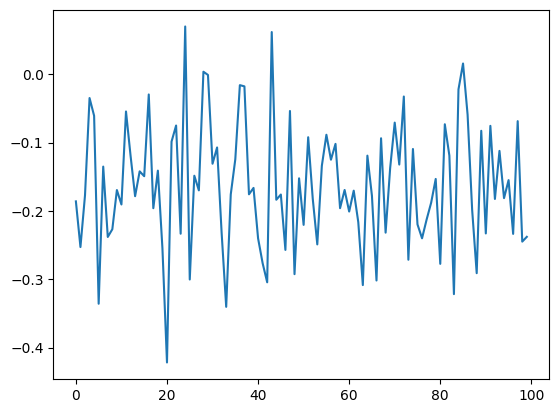

In [10]:
plt.plot(alg.E.flatten())

[[5.36243517 5.29289991 5.27507761 5.2588696  5.24749707 5.23815563
  5.23013692 5.22298474 5.21648589 5.21050696 5.20499052 5.19985128
  5.19507378 5.19061706 5.18646254 5.18256924 5.17893277 5.17551684
  5.17233907 5.16935135 5.16655386 5.16391639 5.16146672 5.15915798
  5.15698969 5.15495019 5.15302986 5.15122451 5.14953484 5.1479126
  5.14639954 5.14495625 5.14360386 5.14232603 5.14111741 5.13998635
  5.1389144  5.13790989 5.13696663 5.13609425 5.13528279 5.1345359
  5.13385738 5.13324842 5.13269065 5.13221421 5.13180438 5.13146481
  5.13119388 5.1309991  5.13087974 5.13082609 5.13084799 5.13095134
  5.13111769 5.13136147 5.13167998 5.13207786 5.13254409 5.13306669
  5.13368427 5.13436607 5.13511156 5.13594145 5.13683516 5.13779697
  5.13882207 5.13992349 5.14108442 5.14232943 5.14364134 5.14501305
  5.14646102 5.14797993 5.14957396 5.15125424 5.15300775 5.15486048
  5.15679437 5.15882737 5.16096652 5.16322961 5.1656292  5.16818327
  5.1709066  5.17381432 5.1769591  5.1803512  5.18

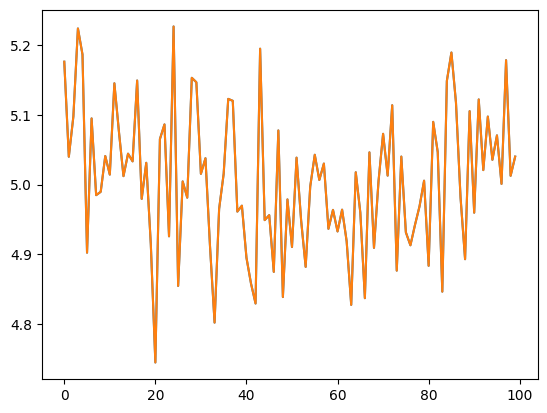

In [7]:
print(alg.L)
print(alg.E)
plt.plot(x.flatten())
plt.plot((alg.L + alg.E).flatten())

In [19]:
np.random.seed(0)
toy_data = toy_datasets.linear_trending_with_gaussian_noise(offset=5).reshape(-1, 1).T
alg = Stage3Algorithm(num_elements=num_elements, h_order=20, ar_order=3)
x = toy_data
alg.fit(x)

c:\Users\chris\fyp\venv\lib\site-packages\scipy\optimize\_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


[[4.20202762 4.16544698 4.1719399  4.18031429 4.1906383  4.20239241
  4.21520972 4.22882612 4.24304851 4.25773673 4.27278908 4.28813159
  4.30370973 4.31948392 4.33542593 4.35151346 4.36773193 4.3840696
  4.40051787 4.41707021 4.43372259 4.45047107 4.46731314 4.48424681
  4.50127067 4.51838387 4.53558525 4.55287458 4.57025164 4.58771634
  4.6052691  4.6229094  4.64063855 4.65845602 4.67636277 4.69435938
  4.71244637 4.73062418 4.7488928  4.76725378 4.78570748 4.80425357
  4.82289327 4.84162709 4.86045507 4.87937816 4.89839636 4.91751016
  4.9367208  4.95602837 4.97543346 4.99493733 5.01453997 5.03424198
  5.05404485 5.07394865 5.09395431 5.11406223 5.13427279 5.15458725
  5.17500526 5.19552875 5.21615704 5.23689158 5.2577332  5.27868269
  5.29974118 5.32091018 5.34219101 5.36358571 5.38509628 5.40672508
  5.42847404 5.45034736 5.47234746 5.49447787 5.51674241 5.53914547
  5.56169132 5.58438511 5.60723162 5.63023741 5.65340702 5.67675057
  5.7002681  5.7239794  5.74787149 5.7719911  5.7

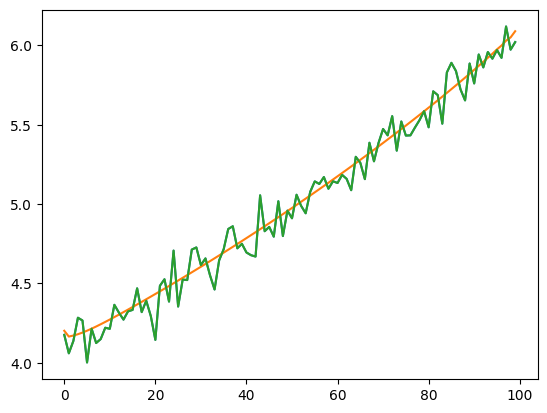

In [20]:
print(alg.L)
print(alg.E)
plt.plot(x.flatten())
plt.plot(alg.L.flatten())
plt.plot((alg.L + alg.E).flatten())

In [21]:
np.random.seed(0)
toy_data = toy_datasets.periodical_linear_with_gaussian_noise().reshape(-1, 1).T
alg = Stage3Algorithm(num_elements=num_elements, h_order=20, ar_order=3)
x = toy_data
alg.fit(x)

c:\Users\chris\fyp\venv\lib\site-packages\scipy\optimize\_differentiable_functions.py:504: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(delta_x, delta_g)


[[4.29227926 4.61898515 4.85207423 5.01547413 5.12730187 5.20129849
  5.2477731  5.27441101 5.28693306 5.28954856 5.28533532 5.2765467
  5.26480282 5.2512588  5.23673992 5.2218106  5.20685212 5.19210517
  5.1777117  5.16375929 5.15026509 5.13723215 5.12463958 5.11247011
  5.10068793 5.08926437 5.0781711  5.06738946 5.05689393 5.04669046
  5.03678253 5.02718887 5.01794565 5.00906951 5.00059057 4.99251648
  4.98485171 4.97759163 4.97072906 4.96424255 4.95813832 4.95240457
  4.94701008 4.94193714 4.93715527 4.93260539 4.92826825 4.92407464
  4.92004456 4.91612535 4.91233662 4.90865454 4.90509767 4.90164755
  4.8983265  4.89514917 4.89214617 4.88937616 4.88689335 4.88477652
  4.88306942 4.88186807 4.88121356 4.88115191 4.88171658 4.88290812
  4.88471946 4.88712043 4.89004254 4.89341684 4.89714567 4.90115032
  4.90533106 4.90960403 4.91390705 4.91817365 4.92238705 4.9265118
  4.9305681  4.9345671  4.93852683 4.94249915 4.94651401 4.95062637
  4.95487926 4.95933747 4.96406612 4.9691399  4.97

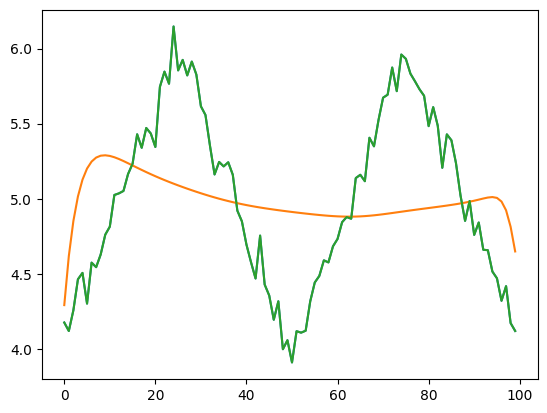

In [22]:
print(alg.L)
print(alg.E)
plt.plot(x.flatten())
plt.plot(alg.L.flatten())
plt.plot((alg.L + alg.E).flatten())

In [23]:
np.random.seed(0)
toy_data = toy_datasets.periodical_sinusoidal_with_gaussian_noise().reshape(-1, 1).T
alg = Stage3Algorithm(num_elements=num_elements, h_order=20, ar_order=3)
x = toy_data
alg.fit(x)

[[5.26911213 5.36094341 5.44055658 5.51507947 5.58523453 5.65069498
  5.71098533 5.76564051 5.81423102 5.85637047 5.89171747 5.91997804
  5.94090657 5.95431011 5.96004903 5.95803916 5.94825489 5.93072999
  5.90556149 5.8729065  5.8329873  5.7860888  5.73255755 5.67280474
  5.60729916 5.53656652 5.46119078 5.38180394 5.29908427 5.21374701
  5.1265427  5.03824866 4.94965302 4.86155764 4.77476429 4.69006955
  4.60825684 4.53008954 4.45630807 4.38762258 4.3247024  4.26818085
  4.21863206 4.17658068 4.14248075 4.11671535 4.09958679 4.09131549
  4.09202247 4.10173888 4.12039667 4.14782469 4.18375492 4.22781977
  4.27956085 4.33842688 4.40378925 4.47494787 4.55114044 4.63155182
  4.71533351 4.80161225 4.88949736 4.97810412 5.06655659 5.15400146
  5.23961707 5.32262082 5.40227208 5.47788122 5.54880765 5.61446452
  5.67432126 5.72789788 5.77477326 5.8145818  5.8470115  5.87181057
  5.88877987 5.89778171 5.89873637 5.89162324 5.8764819  5.85341686
  5.82258893 5.7842228  5.73860162 5.6860617  5.

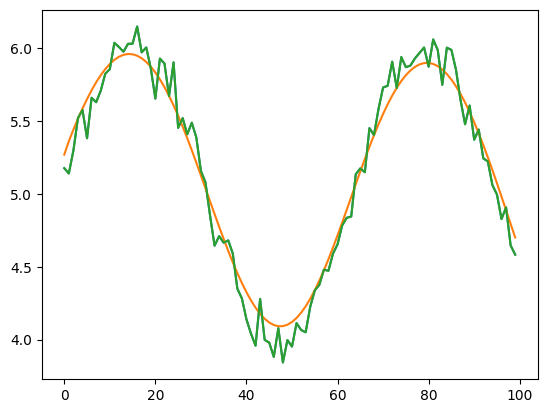

In [24]:
print(alg.L)
print(alg.E)
plt.plot(x.flatten())
plt.plot(alg.L.flatten())
plt.plot((alg.L + alg.E).flatten())